In [1]:
### Data Collection
import pandas as pd


In [2]:
df = pd.read_csv("AAPL.csv")

In [3]:
df.head()

,Unnamed: 0,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,0,AAPL,2015-05-27 00:00:00+00:00,132.045,132.260,130.05,130.34,45833246,121.682558,121.880685,119.844118,120.111360,45833246,0.0,1.0
1,1,AAPL,2015-05-28 00:00:00+00:00,131.780,131.950,131.10,131.86,30733309,121.438354,121.595013,120.811718,121.512076,30733309,0.0,1.0
2,2,AAPL,2015-05-29 00:00:00+00:00,130.280,131.450,129.90,131.23,50884452,120.056069,121.134251,119.705890,120.931516,50884452,0.0,1.0
3,3,AAPL,2015-06-01 00:00:00+00:00,130.535,131.390,130.05,131.20,32112797,120.291057,121.078960,119.844118,120.903870,32112797,0.0,1.0
4,4,AAPL,2015-06-02 00:00:00+00:00,129.960,130.655,129.32,129.86,33667627,119.761181,120.401640,119.171406,119.669029,33667627,0.0,1.0


In [4]:
df.shape

(1258, 15)

In [5]:
df.tail()

,Unnamed: 0,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
1253,1253,AAPL,2020-05-18 00:00:00+00:00,314.96,316.50,310.3241,313.17,33843125,314.96,316.50,310.3241,313.17,33843125,0.0,1.0
1254,1254,AAPL,2020-05-19 00:00:00+00:00,313.14,318.52,313.0100,315.03,25432385,313.14,318.52,313.0100,315.03,25432385,0.0,1.0
1255,1255,AAPL,2020-05-20 00:00:00+00:00,319.23,319.52,316.2000,316.68,27876215,319.23,319.52,316.2000,316.68,27876215,0.0,1.0
1256,1256,AAPL,2020-05-21 00:00:00+00:00,316.85,320.89,315.8700,318.66,25672211,316.85,320.89,315.8700,318.66,25672211,0.0,1.0
1257,1257,AAPL,2020-05-22 00:00:00+00:00,318.89,319.23,315.3500,315.77,20450754,318.89,319.23,315.3500,315.77,20450754,0.0,1.0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1258 entries, 0 to 1257
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   1258 non-null   int64  
 1   symbol       1258 non-null   object 
 2   date         1258 non-null   object 
 3   close        1258 non-null   float64
 4   high         1258 non-null   float64
 5   low          1258 non-null   float64
 6   open         1258 non-null   float64
 7   volume       1258 non-null   int64  
 8   adjClose     1258 non-null   float64
 9   adjHigh      1258 non-null   float64
 10  adjLow       1258 non-null   float64
 11  adjOpen      1258 non-null   float64
 12  adjVolume    1258 non-null   int64  
 13  divCash      1258 non-null   float64
 14  splitFactor  1258 non-null   float64
dtypes: float64(10), int64(3), object(2)
memory usage: 147.5+ KB


In [7]:
df1 =  df.reset_index()['close']

In [8]:
df1.head()

0    132.045
1    131.780
2    130.280
3    130.535
4    129.960
Name: close, dtype: float64

In [9]:
df1.shape

(1258,)

In [10]:
# plotting the datapoints of close
# from 2015 to 2020
import matplotlib.pyplot as plt


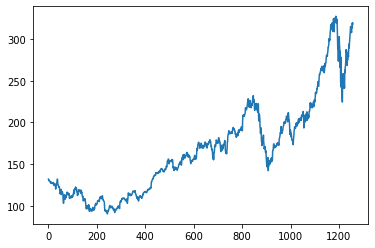

In [11]:
plt.plot(df1)

In [12]:
# LSTM are sensitive to the scale of the data. We need to apply the Min-Max Scaler.
import numpy as np
from sklearn.preprocessing import MinMaxScaler
scaler =  MinMaxScaler(feature_range = (0,1))
df1 = scaler.fit_transform(np.array(df1).reshape(-1,1))



In [13]:
df1

array([[0.17607447],
       [0.17495567],
       [0.16862282],
       ...,
       [0.96635143],
       [0.9563033 ],
       [0.96491598]])

In [14]:
df1.shape

(1258, 1)

In [15]:
# splitting the data into train test split.
# in time series data, we dont use cross validation or randomseed techslen(df1)

train_size = int(len(df1)*0.65)
test_size = int(len(df1) - train_size)


In [16]:
train_size,test_size

(817, 441)

In [17]:
train_data = df1[0:train_size,:]

In [18]:
test_data = df1[0:test_size,:]

In [19]:
train_data

array([[0.17607447],
       [0.17495567],
       [0.16862282],
       [0.1696994 ],
       [0.16727181],
       [0.16794731],
       [0.16473866],
       [0.16174111],
       [0.1581525 ],
       [0.15654817],
       [0.16271215],
       [0.1614878 ],
       [0.1554927 ],
       [0.15443722],
       [0.15730811],
       [0.15604154],
       [0.15849025],
       [0.15308621],
       [0.15735033],
       [0.15490163],
       [0.15946129],
       [0.15688592],
       [0.1537195 ],
       [0.14434687],
       [0.14812547],
       [0.15308621],
       [0.15241071],
       [0.15055307],
       [0.14924428],
       [0.13607194],
       [0.12551718],
       [0.13906949],
       [0.14911762],
       [0.14890653],
       [0.15401503],
       [0.16115005],
       [0.16583636],
       [0.17618002],
       [0.17060711],
       [0.14725998],
       [0.14700667],
       [0.14422021],
       [0.13691632],
       [0.13949168],
       [0.13784514],
       [0.13522756],
       [0.13071012],
       [0.118

In [20]:
#logic for the time stamp vary
# suppose
# data = 1,2,3..........50
# range(39)
# timestamp = 10
# a = data[0:10]...... [1,2,3,4,....10] data[11], data[1:11].......[2,3,4,5,10,11] data[12], data[2:12]......[3,4,5,......12], data[38:48]....[]
# b = 10,11,12..........50
def timestamp_vary(data,timestamp=1):
        dataX = []
        dataY = []
        for i in range(len(data) - timestamp -1):
            a = data[i:(i+timestamp),0]
            dataX.append(a) 
            b = data[i+timestamp,0]
            dataY.append(b)
          
        return np.array(dataX), np.array(dataY)
            

    

In [21]:
timestamp = 100
X_train,y_train = timestamp_vary(train_data,timestamp)
X_test,y_test = timestamp_vary(test_data,timestamp)


In [22]:
X_train

array([[0.17607447, 0.17495567, 0.16862282, ..., 0.09055982, 0.08388922,
        0.09085536],
       [0.17495567, 0.16862282, 0.1696994 , ..., 0.08388922, 0.09085536,
        0.0873934 ],
       [0.16862282, 0.1696994 , 0.16727181, ..., 0.09085536, 0.0873934 ,
        0.09030651],
       ...,
       [0.34801148, 0.32930845, 0.32145571, ..., 0.50042219, 0.50413747,
        0.5062062 ],
       [0.32930845, 0.32145571, 0.32694419, ..., 0.50413747, 0.5062062 ,
        0.51920966],
       [0.32145571, 0.32694419, 0.32230009, ..., 0.5062062 , 0.51920966,
        0.53719497]])

In [23]:
y_train

array([0.0873934 , 0.09030651, 0.09891919, 0.09887697, 0.10622309,
       0.1213375 , 0.10529427, 0.10221228, 0.12213966, 0.12745926,
       0.1231107 , 0.1302035 , 0.13607194, 0.13366546, 0.1291058 ,
       0.12969687, 0.12762813, 0.1115849 , 0.10879845, 0.1071519 ,
       0.09288187, 0.10062906, 0.09858144, 0.11378029, 0.12007093,
       0.12226632, 0.11572237, 0.12049312, 0.1169045 , 0.11597568,
       0.11804441, 0.11399139, 0.10951617, 0.10495651, 0.1211264 ,
       0.11795998, 0.11774888, 0.10672971, 0.10905176, 0.09642827,
       0.09347294, 0.08507135, 0.08865997, 0.07869628, 0.06624166,
       0.07173014, 0.07130795, 0.07713417, 0.07468547, 0.06957697,
       0.07768302, 0.07168792, 0.0629908 , 0.06337077, 0.05222494,
       0.04373892, 0.02579583, 0.027949  , 0.03457739, 0.04061471,
       0.02976442, 0.03875707, 0.02866672, 0.02668243, 0.02723128,
       0.02516254, 0.04677869, 0.03841932, 0.04074137, 0.01300346,
       0.01583214, 0.02955332, 0.02571139, 0.01747868, 0.02537

In [24]:
y_train.shape

(716,)

In [25]:
X_train.shape

(716, 100)

In [26]:
# reshape the inputs to 3 dim i.e [samples,timestampsmfeatures]
X_train = X_train.reshape(X_train.shape[0],X_train.shape[1],1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1],1)

In [27]:
X_train.shape

(716, 100, 1)

In [28]:
X_test.shape

(340, 100, 1)

In [29]:
# build the stacked lstm
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM



In [30]:
model = Sequential()
#That return sequences return the hidden state output for each input time step.
#That return state returns the hidden state output and cell state for the last input time step.
#That return sequences and return state can be used at the same time.
model.add(LSTM(50,return_sequences=True,input_shape = (100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss = "mean_squared_error",optimizer = 'Adam')




In [31]:
# summary of the model
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 lstm_1 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [32]:
# train the model
model.fit(X_train,y_train,validation_data = (X_test,y_test),epochs = 100,batch_size = 64,verbose = 1)

Epoch 1/100
12/12 [==============================] - 6s 219ms/step - loss: 0.0194 - val_loss: 0.0025
Epoch 2/100
12/12 [==============================] - 1s 121ms/step - loss: 0.0037 - val_loss: 8.8007e-04
Epoch 3/100
12/12 [==============================] - 2s 128ms/step - loss: 9.6598e-04 - val_loss: 5.8608e-04
Epoch 4/100
12/12 [==============================] - 2s 142ms/step - loss: 6.4139e-04 - val_loss: 5.0861e-04
Epoch 5/100
12/12 [==============================] - 2s 130ms/step - loss: 6.4970e-04 - val_loss: 4.9444e-04
Epoch 6/100
12/12 [==============================] - 1s 124ms/step - loss: 6.0502e-04 - val_loss: 4.8756e-04
Epoch 7/100
12/12 [==============================] - 2s 146ms/step - loss: 6.0531e-04 - val_loss: 4.6645e-04
Epoch 8/100
12/12 [==============================] - 2s 151ms/step - loss: 6.0113e-04 - val_loss: 4.7034e-04
Epoch 9/100
12/12 [==============================] - 2s 127ms/step - loss: 6.0896e-04 - val_loss: 4.4647e-04
Epoch 10/100
12/12 [===========

12/12 [==============================] - 1s 125ms/step - loss: 1.8267e-04 - val_loss: 1.2669e-04
Epoch 76/100
12/12 [==============================] - 2s 133ms/step - loss: 1.7713e-04 - val_loss: 1.3307e-04
Epoch 77/100
12/12 [==============================] - 2s 126ms/step - loss: 1.7836e-04 - val_loss: 1.2218e-04
Epoch 78/100
12/12 [==============================] - 2s 134ms/step - loss: 1.7849e-04 - val_loss: 1.2015e-04
Epoch 79/100
12/12 [==============================] - 1s 125ms/step - loss: 1.7236e-04 - val_loss: 1.2083e-04
Epoch 80/100
12/12 [==============================] - 2s 126ms/step - loss: 1.6854e-04 - val_loss: 1.1744e-04
Epoch 81/100
12/12 [==============================] - 1s 122ms/step - loss: 1.6021e-04 - val_loss: 1.1590e-04
Epoch 82/100
12/12 [==============================] - 1s 124ms/step - loss: 1.6695e-04 - val_loss: 1.1665e-04
Epoch 83/100
12/12 [==============================] - 1s 125ms/step - loss: 1.7349e-04 - val_loss: 1.1496e-04
Epoch 84/100
12/12 [===

In [33]:
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

In [34]:
# perform reverse scaling in order to find the rmse
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)


In [35]:
# calculate the rmse performance
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

140.58146819061065

In [36]:
# now rmse for the test data
math.sqrt(mean_squared_error(y_test,test_predict))

108.15455607555103

In [37]:
train_predict.shape

(716, 1)

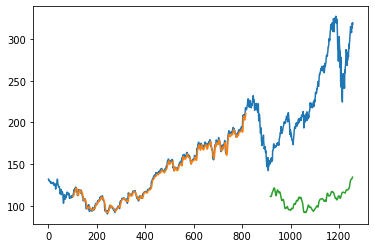

In [38]:
### Plotting 
import numpy
# shift train predictions for plotting
look_back=100
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict   # [100:816,:]

# shift test predictions for plotting
testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict  # [917:1257]
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [39]:
len(test_data )

441

In [40]:
x_input = test_data[341:]

In [41]:
x_input.shape

(100, 1)

In [42]:
x_input = test_data[341:].reshape(1,-1)

In [43]:
x_input.shape

(1, 100)

In [44]:
a=x_input.reshape(1,-1)
a = a.reshape((1, 100, 1))

In [45]:
a.shape

(1, 100, 1)

In [46]:
a

array([[[0.09587942],
        [0.09364181],
        [0.09566833],
        [0.09587942],
        [0.09942582],
        [0.10014354],
        [0.10854513],
        [0.10960061],
        [0.11399139],
        [0.1124715 ],
        [0.11521574],
        [0.11487799],
        [0.11454023],
        [0.11306257],
        [0.11280925],
        [0.11086718],
        [0.11530018],
        [0.11783332],
        [0.10660306],
        [0.10191674],
        [0.0987081 ],
        [0.09794816],
        [0.08929325],
        [0.08971544],
        [0.08228489],
        [0.07810521],
        [0.0847336 ],
        [0.08747784],
        [0.08671789],
        [0.07367221],
        [0.07637423],
        [0.06489065],
        [0.07080132],
        [0.0829604 ],
        [0.08279152],
        [0.08325593],
        [0.09030651],
        [0.09060204],
        [0.08819556],
        [0.09055982],
        [0.08963101],
        [0.0891666 ],
        [0.08519801],
        [0.08084945],
        [0.08258043],
        [0

In [47]:
# now convert it into list
temp_input = list(x_input)


In [48]:
 temp_input

[array([0.09587942, 0.09364181, 0.09566833, 0.09587942, 0.09942582,
        0.10014354, 0.10854513, 0.10960061, 0.11399139, 0.1124715 ,
        0.11521574, 0.11487799, 0.11454023, 0.11306257, 0.11280925,
        0.11086718, 0.11530018, 0.11783332, 0.10660306, 0.10191674,
        0.0987081 , 0.09794816, 0.08929325, 0.08971544, 0.08228489,
        0.07810521, 0.0847336 , 0.08747784, 0.08671789, 0.07367221,
        0.07637423, 0.06489065, 0.07080132, 0.0829604 , 0.08279152,
        0.08325593, 0.09030651, 0.09060204, 0.08819556, 0.09055982,
        0.08963101, 0.0891666 , 0.08519801, 0.08084945, 0.08258043,
        0.07924512, 0.08279152, 0.08735118, 0.09195305, 0.09967914,
        0.0969349 , 0.1049143 , 0.1049143 , 0.10757409, 0.10820738,
        0.11103606, 0.11234485, 0.11280925, 0.10955839, 0.11052943,
        0.11365364, 0.11154268, 0.11141603, 0.10757409, 0.10896732,
        0.10841848, 0.1109094 , 0.11639787, 0.12095753, 0.12146416,
        0.12416617, 0.12205522, 0.12116862, 0.12

In [49]:
len( temp_input)

1

In [50]:
temp_input= temp_input[0].tolist()

In [51]:
temp_input

[0.09587942244363756,
 0.09364181372962932,
 0.09566832728193869,
 0.09587942244363756,
 0.099425821160179,
 0.10014354470995529,
 0.10854513214557121,
 0.10960060795406568,
 0.11399138731740271,
 0.1124715021531707,
 0.11521573925525624,
 0.11487798699653806,
 0.11454023473781982,
 0.11306256860592756,
 0.11280925441188888,
 0.11086717892425907,
 0.11530017731993586,
 0.11783331926032259,
 0.1066030566579414,
 0.10191674406822598,
 0.09870809761040278,
 0.0979481550282868,
 0.08929325339863209,
 0.08971544372202989,
 0.08228489403022882,
 0.07810520982859076,
 0.08473359790593599,
 0.08747783500802164,
 0.08671789242590561,
 0.07367221143291397,
 0.07637422950265982,
 0.06489065270623995,
 0.070801317233809,
 0.08296039854766529,
 0.08279152241830617,
 0.08325593177404378,
 0.0903065101747868,
 0.09060204340116523,
 0.08819555855779787,
 0.09055982436882548,
 0.08963100565735033,
 0.08916659630161272,
 0.08519800726167354,
 0.08084944693067636,
 0.0825804272566073,
 0.0792451237017647

In [52]:
len( temp_input)

100

In [53]:
# demonstrate prediction for next 10 days
from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<30):
    
    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])  # as one record added earlier
        print("{} day input {}".format(i,x_input))
        print(" i am the length of x input:::")
        print(len(x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))  # [1,100,1]
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        print(" i am the length of temp input:::")
        print(len(temp_input))
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat)
        print(yhat[0])
        print("I am still in else part***********")
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

[[0.18955438]]
[0.18955438]
I am still in else part***********
101
1 day input [0.09364181 0.09566833 0.09587942 0.09942582 0.10014354 0.10854513
 0.10960061 0.11399139 0.1124715  0.11521574 0.11487799 0.11454023
 0.11306257 0.11280925 0.11086718 0.11530018 0.11783332 0.10660306
 0.10191674 0.0987081  0.09794816 0.08929325 0.08971544 0.08228489
 0.07810521 0.0847336  0.08747784 0.08671789 0.07367221 0.07637423
 0.06489065 0.07080132 0.0829604  0.08279152 0.08325593 0.09030651
 0.09060204 0.08819556 0.09055982 0.08963101 0.0891666  0.08519801
 0.08084945 0.08258043 0.07924512 0.08279152 0.08735118 0.09195305
 0.09967914 0.0969349  0.1049143  0.1049143  0.10757409 0.10820738
 0.11103606 0.11234485 0.11280925 0.10955839 0.11052943 0.11365364
 0.11154268 0.11141603 0.10757409 0.10896732 0.10841848 0.1109094
 0.11639787 0.12095753 0.12146416 0.12416617 0.12205522 0.12116862
 0.12522165 0.12517943 0.12429283 0.12522165 0.1255594  0.12509499
 0.13315883 0.13341214 0.13345436 0.13210335 0.1309

10 day output [[0.16185397]]
 i am the length of temp input:::
101
11 day input [0.11487799 0.11454023 0.11306257 0.11280925 0.11086718 0.11530018
 0.11783332 0.10660306 0.10191674 0.0987081  0.09794816 0.08929325
 0.08971544 0.08228489 0.07810521 0.0847336  0.08747784 0.08671789
 0.07367221 0.07637423 0.06489065 0.07080132 0.0829604  0.08279152
 0.08325593 0.09030651 0.09060204 0.08819556 0.09055982 0.08963101
 0.0891666  0.08519801 0.08084945 0.08258043 0.07924512 0.08279152
 0.08735118 0.09195305 0.09967914 0.0969349  0.1049143  0.1049143
 0.10757409 0.10820738 0.11103606 0.11234485 0.11280925 0.10955839
 0.11052943 0.11365364 0.11154268 0.11141603 0.10757409 0.10896732
 0.10841848 0.1109094  0.11639787 0.12095753 0.12146416 0.12416617
 0.12205522 0.12116862 0.12522165 0.12517943 0.12429283 0.12522165
 0.1255594  0.12509499 0.13315883 0.13341214 0.13345436 0.13210335
 0.13092122 0.1621633  0.16123448 0.16355653 0.16866503 0.17390019
 0.17605336 0.17765769 0.17639112 0.18133074 0.188

20 day output [[0.14293626]]
 i am the length of temp input:::
101
21 day input [0.09794816 0.08929325 0.08971544 0.08228489 0.07810521 0.0847336
 0.08747784 0.08671789 0.07367221 0.07637423 0.06489065 0.07080132
 0.0829604  0.08279152 0.08325593 0.09030651 0.09060204 0.08819556
 0.09055982 0.08963101 0.0891666  0.08519801 0.08084945 0.08258043
 0.07924512 0.08279152 0.08735118 0.09195305 0.09967914 0.0969349
 0.1049143  0.1049143  0.10757409 0.10820738 0.11103606 0.11234485
 0.11280925 0.10955839 0.11052943 0.11365364 0.11154268 0.11141603
 0.10757409 0.10896732 0.10841848 0.1109094  0.11639787 0.12095753
 0.12146416 0.12416617 0.12205522 0.12116862 0.12522165 0.12517943
 0.12429283 0.12522165 0.1255594  0.12509499 0.13315883 0.13341214
 0.13345436 0.13210335 0.13092122 0.1621633  0.16123448 0.16355653
 0.16866503 0.17390019 0.17605336 0.17765769 0.17639112 0.18133074
 0.18863464 0.19070337 0.19000676 0.19158997 0.19572743 0.19745841
 0.19500971 0.18955438 0.18873262 0.18639366 0.1833

In [56]:
# now the plotting part
import matplotlib.pyplot as plt
day_new = np.arange(1,101)
day_pred = np.arange(101,131)

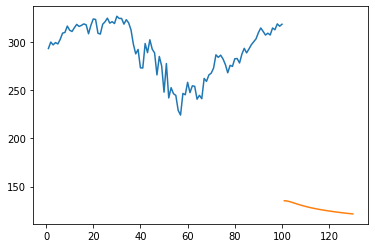

In [57]:
plt.plot(day_new,scaler.inverse_transform(df1[1158:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))

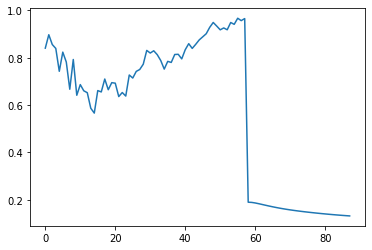

In [58]:
df3=df1.tolist()
df3.extend(lst_output)
plt.plot(df3[1200:])

In [59]:
df3=scaler.inverse_transform(df3).tolist()

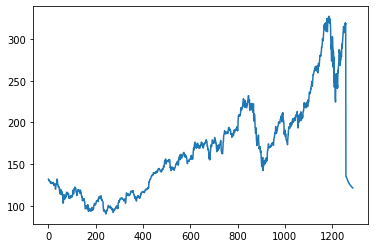

In [60]:
plt.plot(df3)